<p style="text-align: right;">
   <strong>PRESENTED BY: KAREEM AMEERAH</strong><br>
   <strong>DATE: 24TH OF OCTOBER 2024</strong>
<p>


# Ameerah's SmartPredict: Machine Learning-Based Breast Cancer Prediction System 

>Ameerah's SmartPredict is an advanced machine learning system designed to predict the likelihood of breast cancer by analyzing clinical data and laboratory Data. 

>**Utilizing data-driven techniques**, the project integrates various classification algorithms to identify patterns and provide accurate, early detection of breast cancer. 

>This innovative approach aims to **assist healthcare professionals** in making informed quick decisions, improving diagnostic accuracy, and potentially saving lives through early intervention.

# PROJECT OBJECTIVE

### The key challenge against its detection is how to classify tumors into:
- Malignant OR  cancerous
- Benign OR non-cancerous

# IMPORTING NECESSARY LIBRARIES

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [4]:
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
# Scikit-learn for Machine Learning
import sklearn
from sklearn import model_selection
from sklearn.model_selection import (train_test_split, 
    KFold, 
    cross_val_score, 
    StratifiedKFold, 
    learning_curve, 
    GridSearchCV
)

from sklearn.metrics import (
    confusion_matrix, 
    make_scorer, 
    accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Keras for Deep Learning
from keras.models import Sequential, model_from_json
from keras.optimizers import (
    SGD, 
    RMSprop, 
    Adam, 
    Adagrad, 
    Adadelta
)

from keras.layers import (
    Dense, 
    Dropout, 
    Activation
)

from sklearn.preprocessing import StandardScaler

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

#  DATA DESCRIPTION

### DATASET OVERVIEW

##### COLUMNS DEFINITION
- **ID**:	Unique identifier for each record or patient.
- **Age**: The age of the patient, typically in years.
- **Gender**: The patient's gender (e.g., Male, Female)	
- **Nature_of_Aspirate**: Describes the characteristics of the aspirated sample (e.g., hemorrhagic, creamy, serous)	
- **laterallity**: Indicates which of the breasts (left or right) the aspirate was Taken from.
- **Lymph_Node**:	Status or description of lymph node involvement (e.g., Present, Absent).
- **Diagnosis**: The final medical diagnosis based on the data (e.g., benign, malignant).
- **familial_cancer**: This column indicates whether there is a known familial predisposition to cancer in the patient's family history.
- **Tumor_shape**: Tumor_shape: This column describes the morphological characteristics of the tumor as observed in imaging studies.

In [8]:
#Import the Dataset
data = pd.read_csv("C:\\Users\\Ameerah\\Downloads\\breast cancer dataset.csv")
data.head()

,ID,Age,Gender,Nature_of_Aspirate,laterallity,Lymph_Node,Diagnosis,familial_cancer,Tumor_ shape
0,UC-22-001,30,F,hemorrhagic,L,No,1,No,Round
1,UC-22-003,40,F,hemorrhagic,R,No,0,No,Oval
2,UC-22-004,20,F,Clear,L,No,0,No,Round
3,UC-22-005,22,F,hemorrhagic,R,No,0,No,Oval
4,UC-22-006,64,F,sanguineous,L,Yes,1,No,Round


In [38]:
# Display General Information about dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  349 non-null    object
 1   Age                 349 non-null    int64 
 2   Gender              349 non-null    object
 3   Nature_of_Aspirate  349 non-null    object
 4   laterallity         349 non-null    object
 5   Lymph_Node          349 non-null    object
 6   Diagnosis           349 non-null    int64 
 7   familial_cancer     349 non-null    object
 8   Tumor_ shape        349 non-null    object
dtypes: int64(2), object(7)
memory usage: 24.7+ KB
None


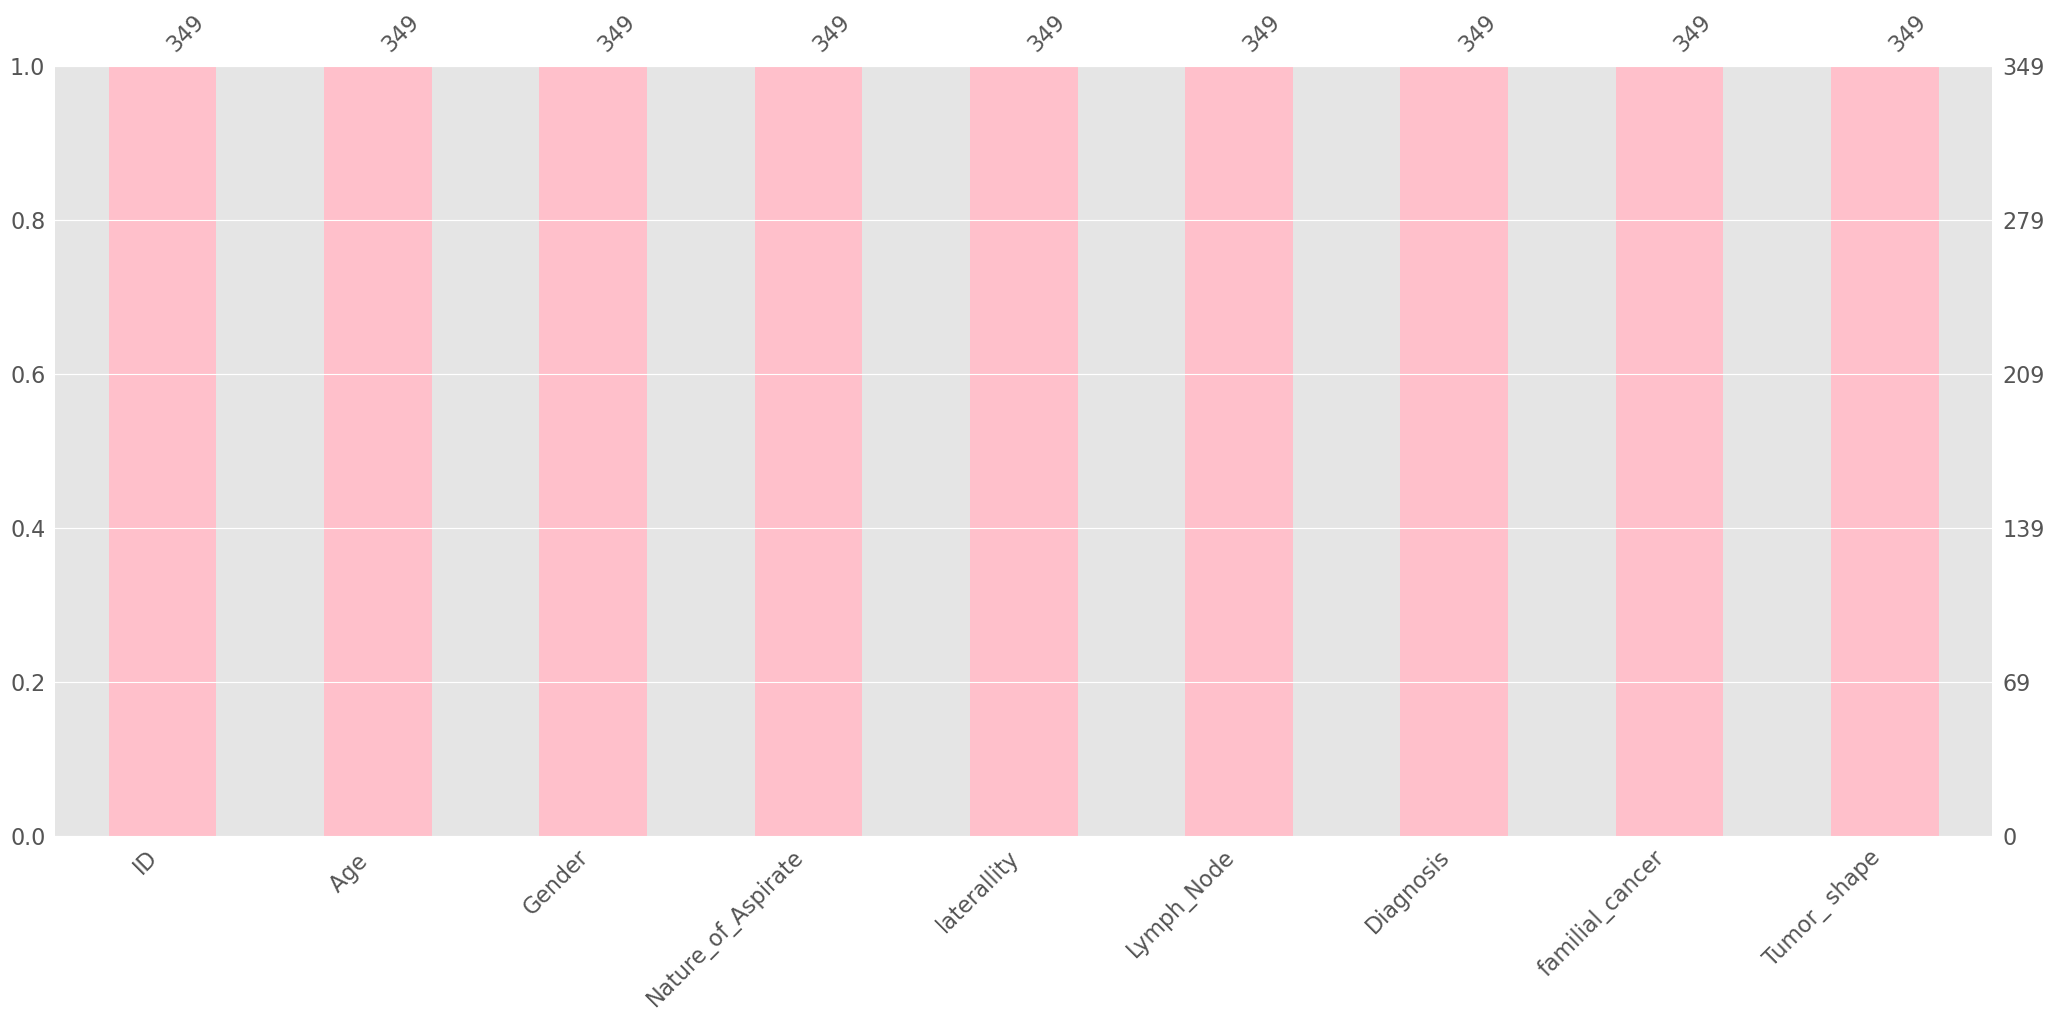

In [10]:
# Display the gradient values
msno.bar(data, color="pink") 

plt.show()

In [12]:
# Statistical description of numeric columns 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,349.0,38.879656,15.020957,2.0,26.0,38.0,48.0,82.0
Diagnosis,349.0,0.346705,0.476604,0.0,0.0,0.0,1.0,1.0


In [14]:
# Statistical description of Categorical columns 
data.describe(include = "object").T

,count,unique,top,freq
ID,349,346,UC-22-035,2
Gender,349,2,F,325
Nature_of_Aspirate,349,16,hemorrhagic,147
laterallity,349,2,L,181
Lymph_Node,349,2,No,253
familial_cancer,349,2,No,296
Tumor_ shape,349,6,Round,191


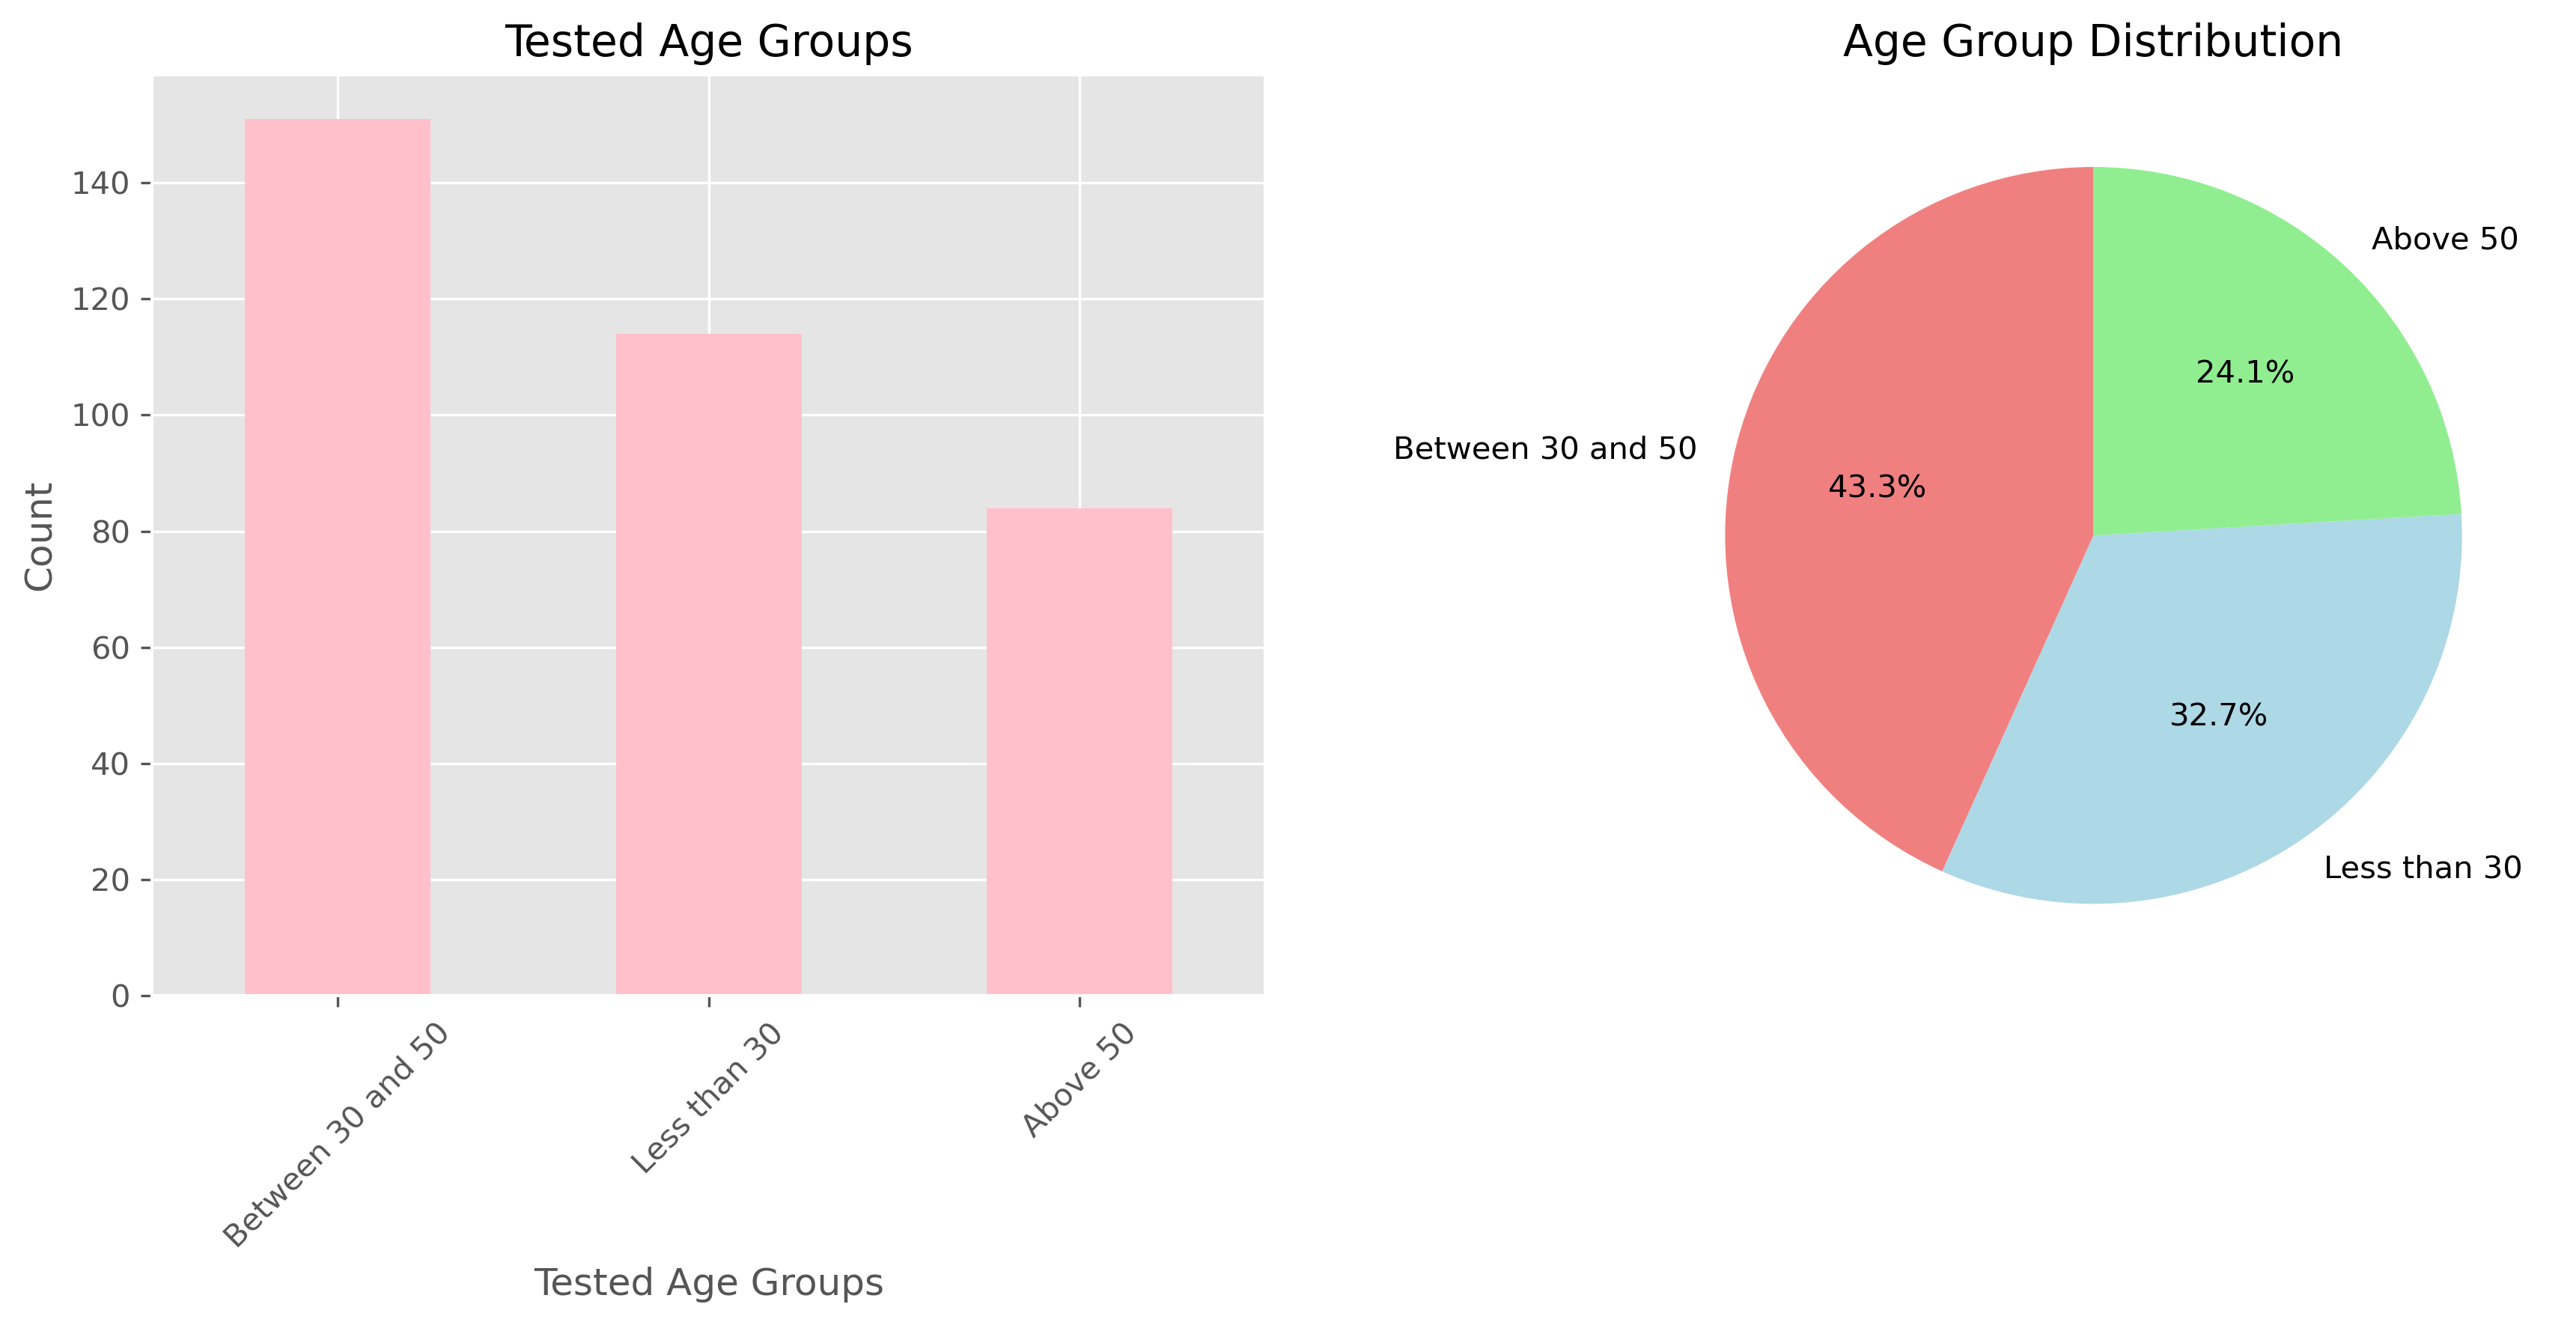

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins and labels for age groups
bins = [0, 30, 50, 100]  # Define bins for the age groups
labels = ['Less than 30', 'Between 30 and 50', 'Above 50']  # Labels for the groups

# Create age group counts directly using the correct column name
age_group_counts = pd.cut(data['Age '], bins=bins, labels=labels, right=False).value_counts()

# Bar Chart
plt.figure(figsize=(12, 6), dpi=300)  # Increase figure size and DPI

# Create bar chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
age_group_counts.plot(kind='bar', color='pink')
plt.title('Tested Age Groups', fontsize=14)
plt.xlabel('Tested Age Groups', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Pie Chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Age Group Distribution', fontsize=14)
plt.ylabel('')  # Remove y-label for pie chart

# Show the plots
plt.tight_layout()
plt.show()

# Save the figure with higher quality if needed
plt.savefig('age_group_distribution.png', dpi=800, bbox_inches='tight')  # Save as PNG with high DPI


<Figure size 640x480 with 0 Axes>

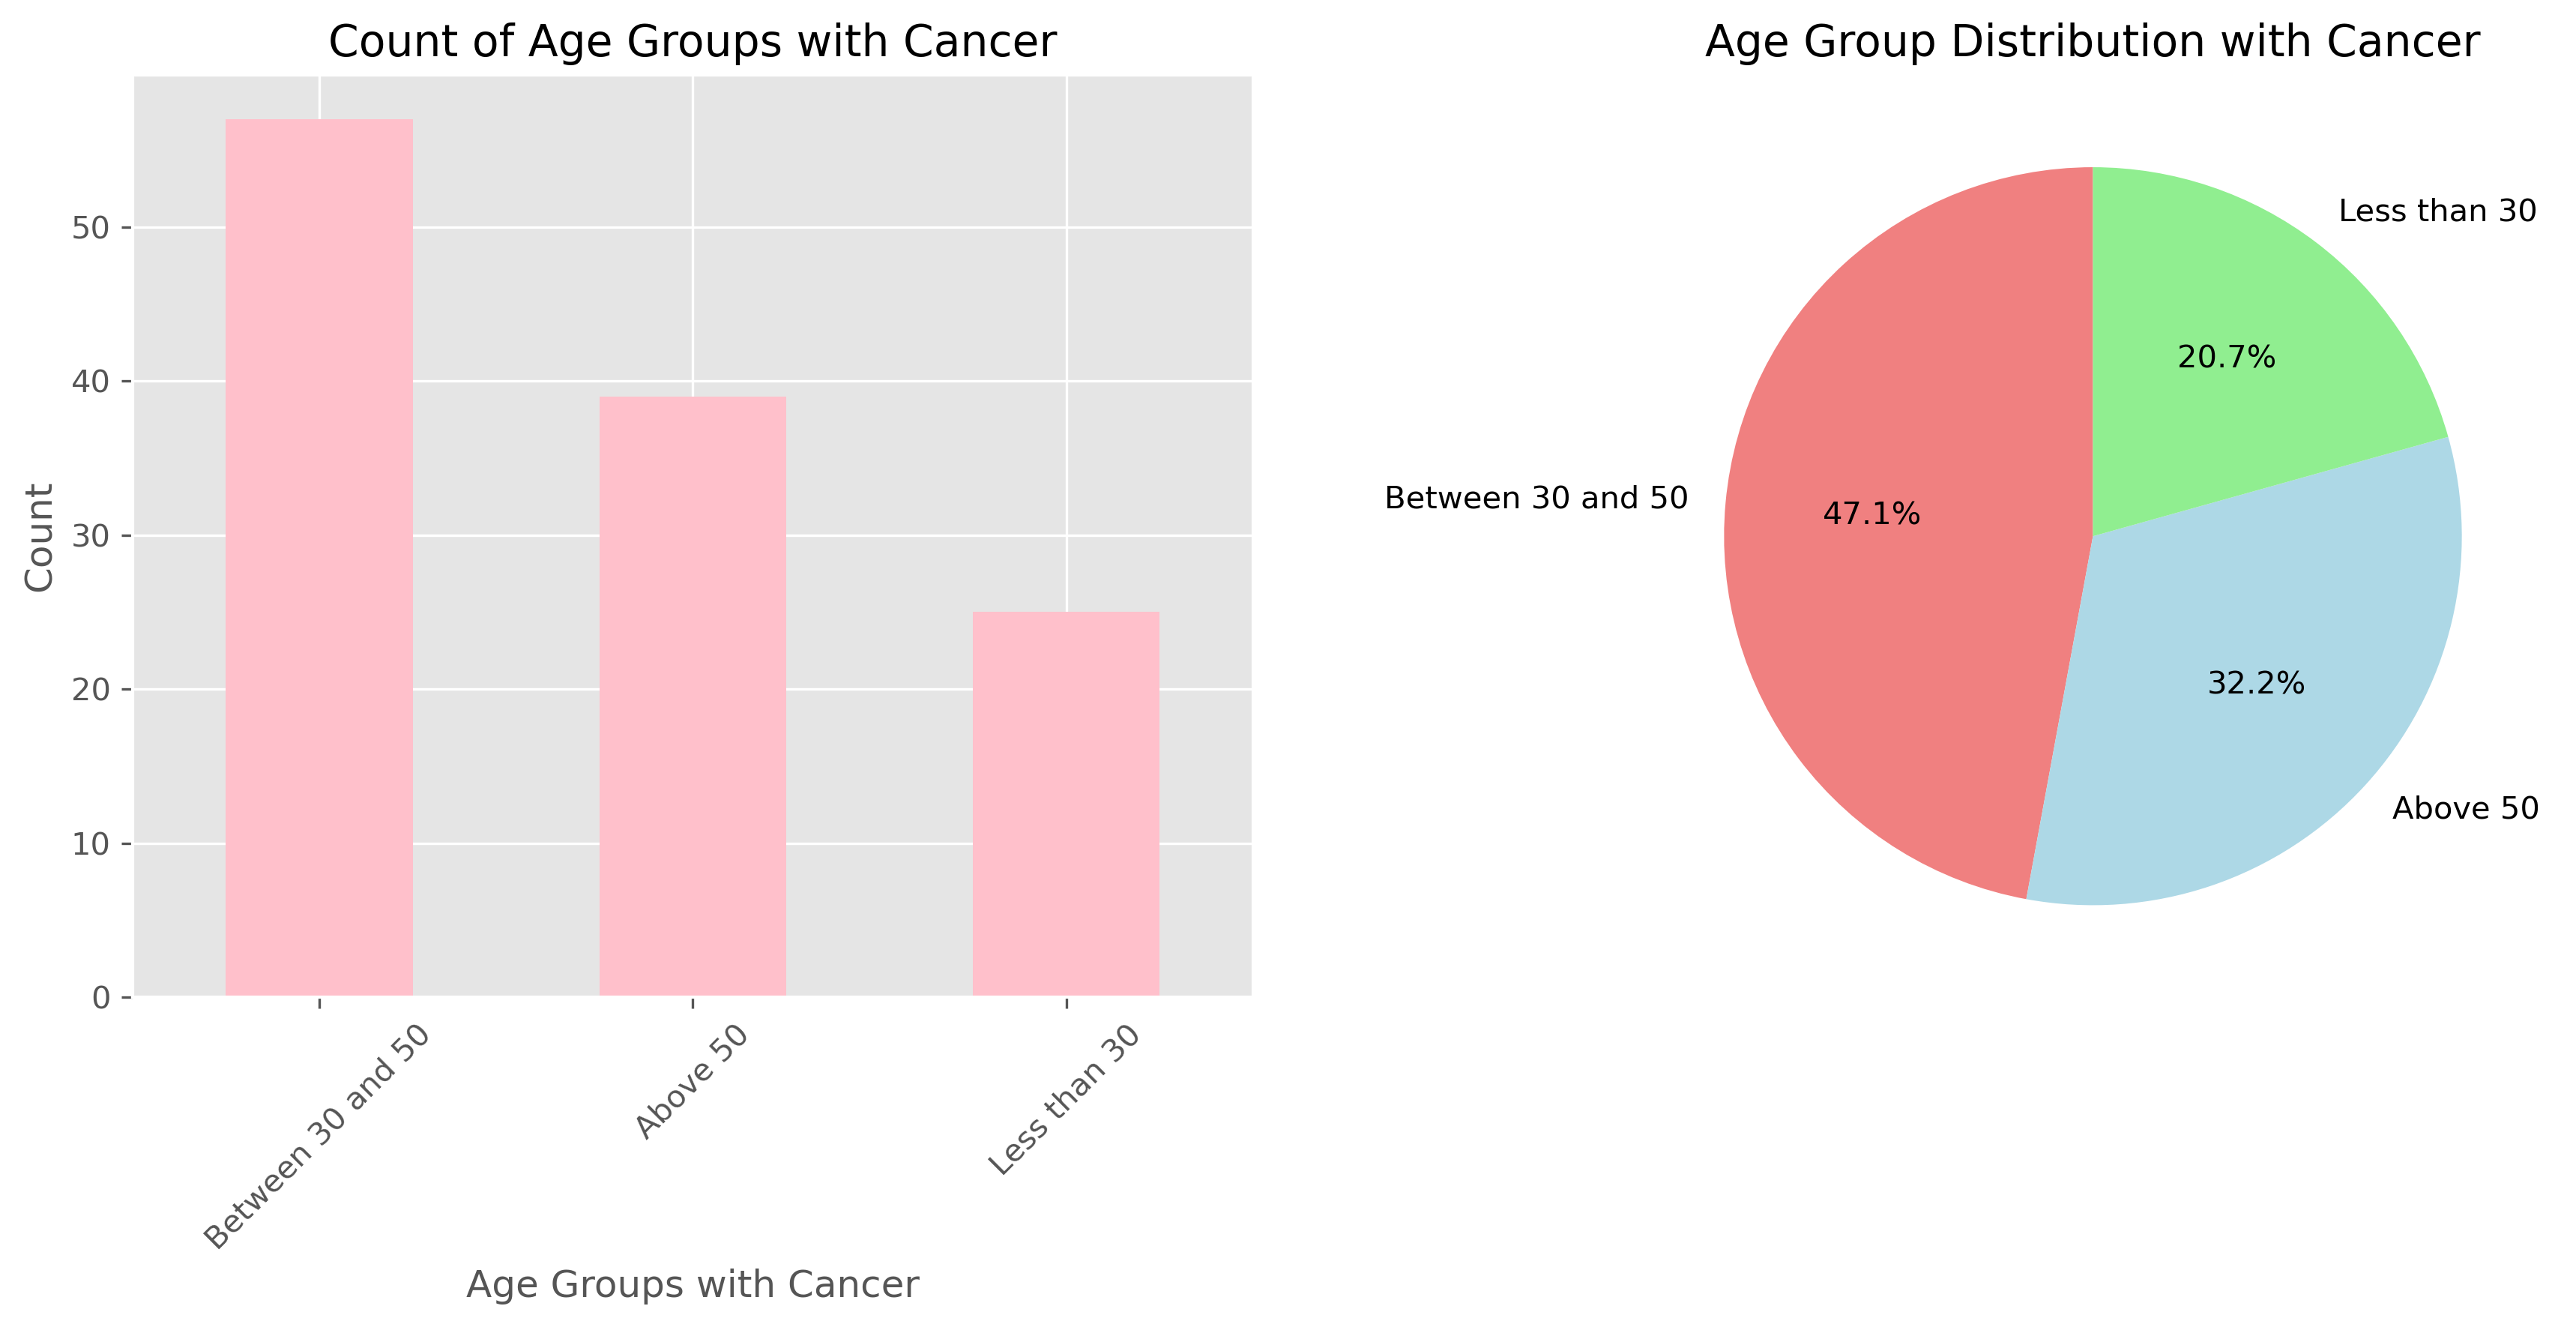

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins and labels for age groups
bins = [0, 30, 50, 100]  # Define bins for the age groups
labels = ['Less than 30', 'Between 30 and 50', 'Above 50']  # Labels for the groups

# Filter the data for those diagnosed with cancer
filtered_data = data[data['Diagnosis'] == 1]

# Create age group counts directly using the correct column name
age_group_counts = pd.cut(filtered_data['Age '], bins=bins, labels=labels, right=False).value_counts()

# Bar Chart
plt.figure(figsize=(12, 6), dpi=300)  # Increase figure size and DPI

# Create bar chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
age_group_counts.plot(kind='bar', color='pink')
plt.title('Count of Age Groups with Cancer', fontsize=14)
plt.xlabel('Age Groups with Cancer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Pie Chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Age Group Distribution with Cancer', fontsize=14)
plt.ylabel('')  # Remove y-label for pie chart

# Show the plots
plt.tight_layout()
plt.show()

# Save the figure with higher quality if needed
plt.savefig('age_group_distribution_cancer.png', dpi=800, bbox_inches='tight')  # Save as PNG with high DPI

<Figure size 640x480 with 0 Axes>

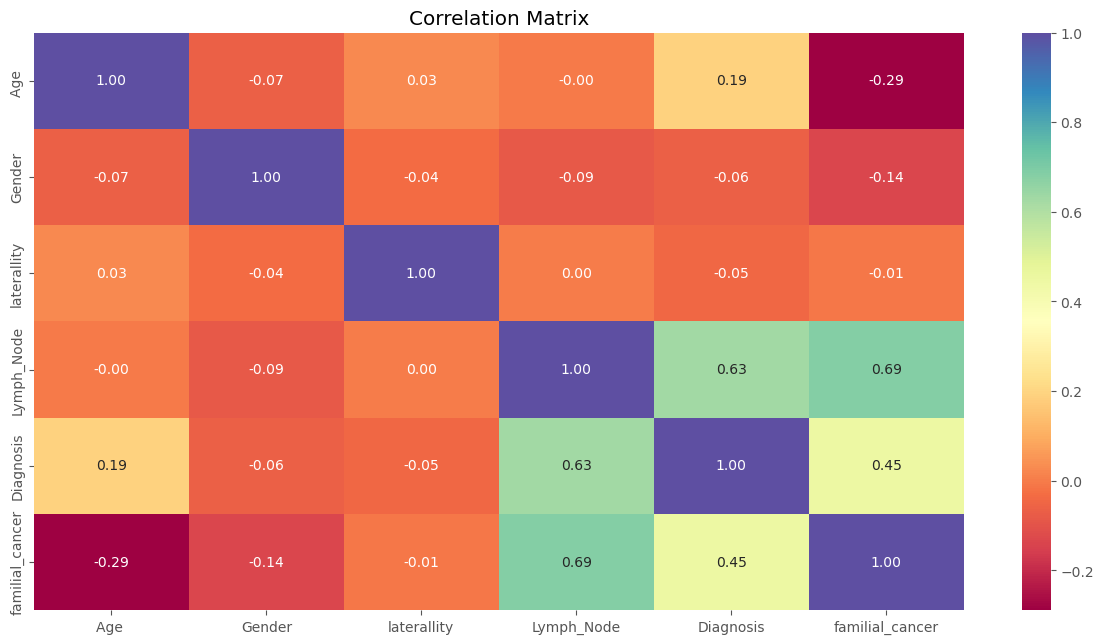

In [32]:
numerical_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(15, 7.5))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

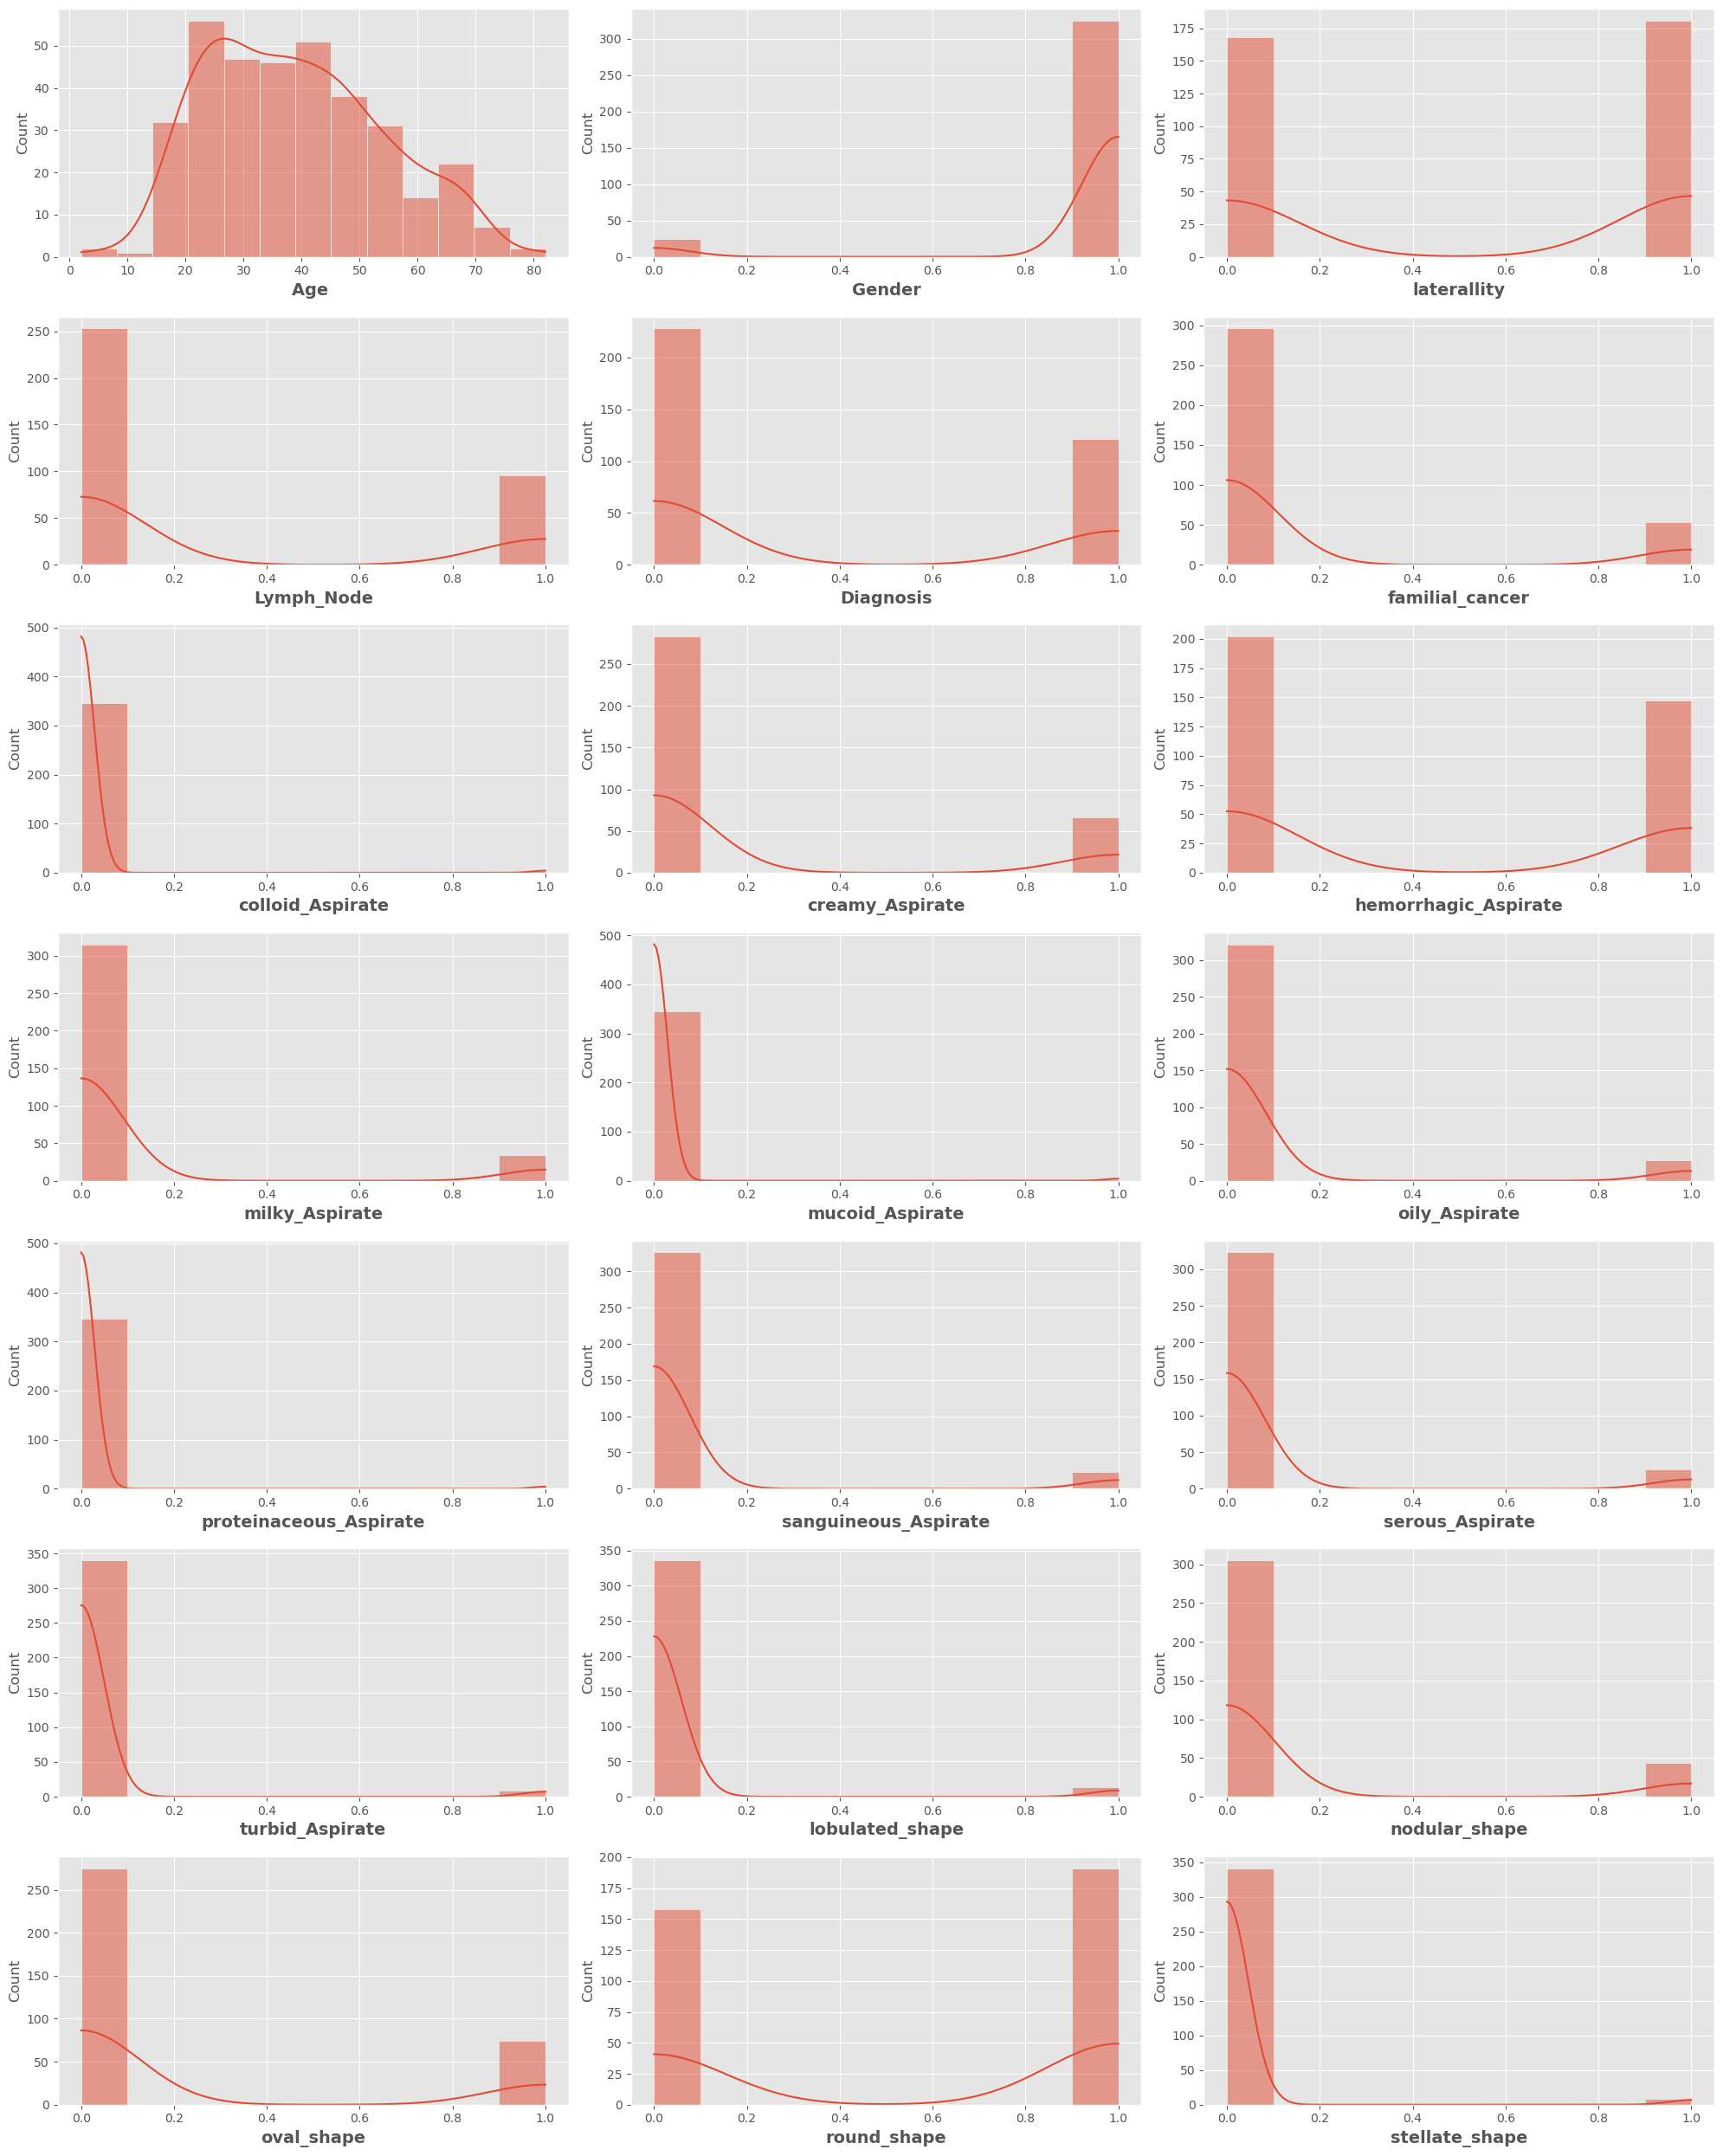

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 25))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(7, 3, plotnumber)
        sns.histplot(df[column], kde=True)  # Updated to use histplot instead of distplot (since distplot is deprecated)
        plt.xlabel(column, fontsize=14, fontweight='bold')  # Make x-label bold and larger
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# DATA PREPARATION

In [20]:
# Ensure all data label in the "Nature_of_Aspirate" column are in the same casing to avoid duplication
data['Nature_of_Aspirate'] = data['Nature_of_Aspirate'].str.lower()

In [22]:
# Ensure all data label in the "Tumor_ shape" column are in the same casing to avoid duplication
data['Tumor_ shape'] = data['Tumor_ shape'].str.lower()

In [24]:
# Assign dataframe to a new variable name
df = data

In [26]:
# Encode Bivariable Columns (Label Encoding)
df = pd.DataFrame(data)

# Define the mapping for the columns
gender_mapping = {'F': 1,'M': 0}
laterallity_mapping = {'L':1, 'R':0}
Lymph_Node_mapping = {'Yes':1, 'No':0}
familial_cancer_mapping = {'Yes':1, 'No':0}
# Apply the mapping
df['Gender'] = df['Gender'].map(gender_mapping)
df['laterallity'] = df['laterallity'].map(laterallity_mapping)
df['Lymph_Node'] = df['Lymph_Node'].map(Lymph_Node_mapping)
df['familial_cancer'] = df['familial_cancer'].map(familial_cancer_mapping)

In [28]:
# Perform one-hot encoding for the "Nature_of_Aspirate" column with a custom suffix
one_hot_encoded = pd.get_dummies(df['Nature_of_Aspirate'], prefix='', drop_first=True)

# Rename the columns to add a suffix
one_hot_encoded.columns = [f'{col}_Aspirate' for col in one_hot_encoded.columns]


one_hot_encoded.columns = [col[1:] for col in one_hot_encoded.columns]

# Combine the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)
df = df.drop("Nature_of_Aspirate", axis = 1)

In [30]:
# Perform one-hot encoding for the "Nature_of_Aspirate" column with a custom suffix
one_hot_encoded = pd.get_dummies(df['Tumor_ shape'], prefix='', drop_first=True)

# Rename the columns to add a suffix
one_hot_encoded.columns = [f'{col}_shape' for col in one_hot_encoded.columns]


one_hot_encoded.columns = [col[1:] for col in one_hot_encoded.columns]

# Combine the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)
df = df.drop("Tumor_ shape", axis = 1)

In [34]:
df.head(5)

,ID,Age,Gender,laterallity,Lymph_Node,Diagnosis,familial_cancer,colloid_Aspirate,creamy_Aspirate,hemorrhagic_Aspirate,...,oily_Aspirate,proteinaceous_Aspirate,sanguineous_Aspirate,serous_Aspirate,turbid_Aspirate,lobulated_shape,nodular_shape,oval_shape,round_shape,stellate_shape
0,UC-22-001,30,1,1,0,1,0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,UC-22-003,40,1,0,0,0,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,UC-22-004,20,1,1,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,UC-22-005,22,1,0,0,0,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,UC-22-006,64,1,1,1,1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [36]:
# Drop unique identifier column
df = df.drop("ID", axis = 1)

In [40]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [42]:
df.dtypes

Age                       int64
Gender                    int64
laterallity               int64
Lymph_Node                int64
Diagnosis                 int64
familial_cancer           int64
colloid_Aspirate           bool
creamy_Aspirate            bool
hemorrhagic_Aspirate       bool
milky_Aspirate             bool
mucoid_Aspirate            bool
oily_Aspirate              bool
proteinaceous_Aspirate     bool
sanguineous_Aspirate       bool
serous_Aspirate            bool
turbid_Aspirate            bool
lobulated_shape            bool
nodular_shape              bool
oval_shape                 bool
round_shape                bool
stellate_shape             bool
dtype: object

In [44]:
# convert all Boolean to Integer
df = df.astype(int)

In [46]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the display width
df.head()

,Age,Gender,laterallity,Lymph_Node,Diagnosis,familial_cancer,colloid_Aspirate,creamy_Aspirate,hemorrhagic_Aspirate,milky_Aspirate,mucoid_Aspirate,oily_Aspirate,proteinaceous_Aspirate,sanguineous_Aspirate,serous_Aspirate,turbid_Aspirate,lobulated_shape,nodular_shape,oval_shape,round_shape,stellate_shape
0,30,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,40,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,20,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,22,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,64,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### Save the cleaned dataset into a new CSV file 

In [48]:
df.to_csv("Breast cancer dataset refined 2.0.csv", index = False)

In [50]:
# Import the new dataset
import pandas as pd
df= pd.read_csv("Breast cancer dataset refined 2.0.csv")

In [52]:
df.shape

(299, 21)

In [54]:
df.head()

,Age,Gender,laterallity,Lymph_Node,Diagnosis,familial_cancer,colloid_Aspirate,creamy_Aspirate,hemorrhagic_Aspirate,milky_Aspirate,mucoid_Aspirate,oily_Aspirate,proteinaceous_Aspirate,sanguineous_Aspirate,serous_Aspirate,turbid_Aspirate,lobulated_shape,nodular_shape,oval_shape,round_shape,stellate_shape
0,30,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,40,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,20,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,22,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,64,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## MODEL DEVELOPMENT 

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Function to preprocess the data
def preprocess_data(df, target_column, test_size=0.1):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Function to train a given model
def train_model(model, X_train_scaled, y_train):
    model.fit(X_train_scaled, y_train)
    return model

# Function to evaluate model performance
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# Function to find the best model based on F1-score and store results in a DataFrame
def find_best_model(models, X_train_scaled, X_test_scaled, y_train, y_test):
    results = []  # List to hold model names and their corresponding F1 scores
    best_model = None
    best_f1 = float("-inf")
    
    for name, model in models.items():
        print(f"Training {name}...")
        trained_model = train_model(model, X_train_scaled, y_train)
        _, _, _, f1 = evaluate_model(trained_model, X_test_scaled, y_test)
        
        # Append model name and F1 score to results
        results.append({"Model": name, "F1 Score": f1})
        
        if f1 > best_f1:
            best_f1 = f1
            best_model = (name, trained_model)
    
    print(f"\nBest Model: {best_model[0]} with F1-score: {best_f1:.4f}")
    
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    return best_model, results_df

# Initialize classification models with adjusted hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=200),
    "Ridge Classifier": RidgeClassifier(alpha=0.5),
    "Gradient Boosting Classifier": GradientBoostingClassifier(learning_rate=0.1, n_estimators=150),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Random Forest Classifier": RandomForestClassifier(max_depth=10, n_estimators=100),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=15, min_samples_split=5),
     "Support Vector Machine": SVC(C=1.0, gamma=0.05)
}

X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(df, target_column="Diagnosis")
best_model_name, results_df = find_best_model(models, X_train_scaled, X_test_scaled, y_train, y_test) 

# Display all model results in a DataFrame
print("\nAll Model Results:")
print(results_df)

Training Logistic Regression...
Training Ridge Classifier...
Training Gradient Boosting Classifier...
Training K-Nearest Neighbors...


  File "C:\Users\Ameerah\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Ameerah\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ameerah\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Ameerah\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Training Random Forest Classifier...
Training Decision Tree Classifier...
Training Support Vector Machine...

Best Model: Logistic Regression with F1-score: 0.9042

All Model Results:
                          Model  F1 Score
0           Logistic Regression  0.904236
1              Ridge Classifier  0.904236
2  Gradient Boosting Classifier  0.904236
3           K-Nearest Neighbors  0.873333
4      Random Forest Classifier  0.873333
5      Decision Tree Classifier  0.829630
6        Support Vector Machine  0.904236


In [58]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [56]:
assert "Diagnosis" in df.columns, "The target column 'Diagnosis' is missing in the dataset."
assert not df.isnull().values.any(), "The dataset contains missing values."


In [62]:
# Display the results DataFrame
results_df.sort_values(by="F1 Score", ascending=False).reset_index()

,index,Model,F1 Score
0,0,Logistic Regression,0.904236
1,1,Ridge Classifier,0.904236
2,2,Gradient Boosting Classifier,0.904236
3,6,Support Vector Machine,0.904236
4,3,K-Nearest Neighbors,0.873333
5,4,Random Forest Classifier,0.873333
6,5,Decision Tree Classifier,0.829630


### GridSearch for Optimal Logistic Regression Hyperparameters

In [64]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import classification_report, f1_score

# Define the model
log_reg = LogisticRegression(solver='liblinear')  # Use 'liblinear' for small datasets

# Define the grid of hyperparameters to search
param_grid = {
    'C': np.logspace(-4, 4, 30),  # More values for C
    'penalty': ['l1', 'l2', 'elasticnet'],  # Include 'elasticnet' if using a suitable solver
    'max_iter': [100, 200, 300, 400],  # More options for max_iter
    'tol': [1e-4, 1e-3, 1e-2]  # Convergence tolerance
}

# Set up the GridSearchCV to optimize for F1 score
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Print F1 score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best Hyperparameters: {'C': 0.38566204211634725, 'max_iter': 100, 'penalty': 'l1', 'tol': 0.0001}
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        22
           1       0.73      1.00      0.84         8

    accuracy                           0.90        30
   macro avg       0.86      0.93      0.88        30
weighted avg       0.93      0.90      0.90        30

F1 Score: 0.9042362002567395


### Model Cross Validation

In [66]:
X= df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the data

# Define the model with the best hyperparameters
log_reg = LogisticRegression(
    C=32.10344562312671,
    max_iter=300,
    penalty='l2',
    solver='liblinear',
    tol=0.01
)

# Define the Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=5)

# Perform cross-validation with Stratified K-Folds
cv_scores = cross_val_score(log_reg, X, y, cv=skf, scoring='f1')

# Print the results
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))
print("Standard Deviation of F1 Scores:", np.std(cv_scores))

Cross-Validation F1 Scores: [0.91304348 0.86363636 0.82608696 0.84444444 0.7804878 ]
Mean F1 Score: 0.8455398095482931
Standard Deviation of F1 Scores: 0.04357891046531718


# DEEP LEARNING MODEL

In [68]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import f1_score

X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a custom F1 score metric
def f1_score_metric(y_test, y_pred):
    # Convert y_test to float32 to match the type of y_pred
    y_test = tf.cast(y_test, tf.float32)  # Convert to float32

    # Convert probabilities to binary predictions
    y_pred_binary = tf.round(y_pred)  # Round the predictions to get binary values

    # Calculate precision and recall
    precision = tf.reduce_sum(y_test * y_pred_binary) / (tf.reduce_sum(y_pred_binary) + tf.keras.backend.epsilon())
    recall = tf.reduce_sum(y_test * y_pred_binary) / (tf.reduce_sum(y_test) + tf.keras.backend.epsilon())
    
    # Calculate F1 score
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1

# Create a Sequential model
model = Sequential()

# Use Input layer to define input shape
model.add(Input(shape=(len(X.columns),)))  # Define input shape explicitly

# Add Dense layers with adjustments
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())  # Optional: add batch normalization for stable learning
model.add(Dropout(0.2))  # Lower dropout rate
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model with adjusted learning rate and custom F1 score metric
model.compile(optimizer=Adam(learning_rate=0.0015), 
              loss='binary_crossentropy', 
              metrics=['accuracy', f1_score_metric])  # Include F1 score as a metric

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 32 (128.00 B)

### Model Training 

In [70]:
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor
                               patience=5,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored metric

# Fit the model with EarlyStopping
history = model.fit(X_train_scaled, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.15, 
                    verbose=1, 
                    callbacks=[early_stopping])  # Add the callback here


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.3944 - f1_score_metric: 0.5316 - loss: 1.0040 - val_accuracy: 0.3846 - val_f1_score_metric: 0.5727 - val_loss: 0.7251
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4558 - f1_score_metric: 0.5828 - loss: 0.9262 - val_accuracy: 0.3846 - val_f1_score_metric: 0.5727 - val_loss: 0.7044
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4019 - f1_score_metric: 0.5313 - loss: 0.8690 - val_accuracy: 0.3846 - val_f1_score_metric: 0.5727 - val_loss: 0.6863
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4558 - f1_score_metric: 0.5632 - loss: 0.8109 - val_accuracy: 0.5897 - val_f1_score_metric: 0.6333 - val_loss: 0.6700
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4079 - f1_score_metric: 0.5159 - loss: 0.8179 - val_accuracy: 0.5897 - val_f1_score_metric: 0.6333 - val_loss: 0.6564
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5285 - f1_score_metric: 0.5889 

### Model Evaluation

In [72]:
# Evaluate the model on the training data (not recommended for final assessment)
train_loss, train_accuracy, train_f1_score = model.evaluate(X_train_scaled, y_train, verbose=1)

# Print the evaluation results
print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train F1 Score: {train_f1_score:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9401 - f1_score_metric: 0.9049 - loss: 0.2107
Train Loss: 0.2208
Train Accuracy: 0.9331
Train F1 Score: 0.9055


In [74]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_f1_score = model.evaluate(X_test_scaled, y_test, verbose=1)

# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1_score:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9095 - f1_score_metric: 0.8745 - loss: 0.3090
Test Loss: 0.2965
Test Accuracy: 0.9111
Test F1 Score: 0.8831


# RESULTS

<div style="display: flex; justify-content: space-between;">

<div style="margin-right: 40px; width: 65%;">  <!-- Set width to 45% for the first table -->

| **Deep Learning Model Results** | 
|----------------------------------| 
| **Loss**                    | 
| 0.2965                           | 
| **Accuracy**                | 
| 0.9111 (or 91.11%)               | 
| **F1 Score**               | 
| 0.8831 (or 88.31%)               | 

</div>

<div style="width: 65%;">  <!-- Set width to 45% for the second table -->

| **Logistic Regression Results**        | 
|----------------------------------------| 
| **Best Model**: Logistic Regression    | 
| **F1 Score**                          | 
| 0.8455 (or 84.55%)                    | 
| **Accuracy**                          | 
| 0.8600 (or 86.23%)                    | 

</div>

</div>


### KEY INSIGHTS

- **Accuracy:**

>The Deep Learning Model has a higher accuracy (91.11%) compared to the Logistic Regression model (86.23%). This indicates that the Deep Learning Model made correct predictions more often than the Logistic Regression.
- **F1 Score:**

>The Deep Learning Model also has a significantly higher F1 score (88.31%) compared to the Logistic Regression (84.55%). The F1 score is especially important in binary classification problems where class distribution is imbalanced, as it provides a better measure of the model's accuracy on the minority class.

### EVALUATION METRICS

F1 Score, AUC-ROC, and Precision-Recall metrics should be used for evaluation due to the imbalanced nature of the dataset:

- >**F1 Score:** Balances precision and recall, highlighting the model’s effectiveness in identifying the minority class.
  
- >**AUC-ROC:** Assesses the model’s ability to distinguish between classes across different thresholds.
  
- >**Precision-Recall:** Focuses specifically on the performance of the positive class, minimizing false positives.
  
These metrics provide a comprehensive evaluation of the model's performance in handling class imbalance.

### VISUALISATIONS 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


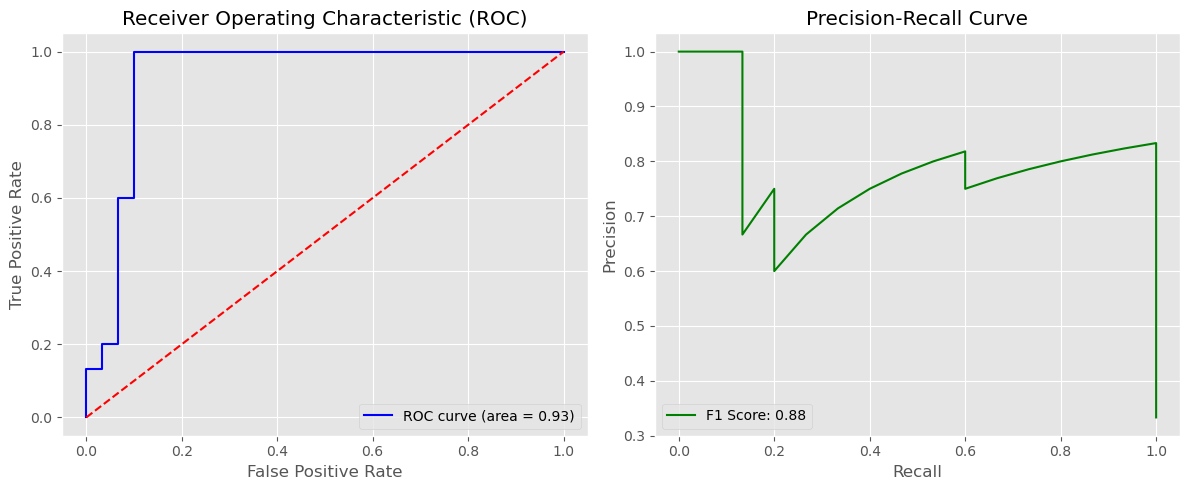

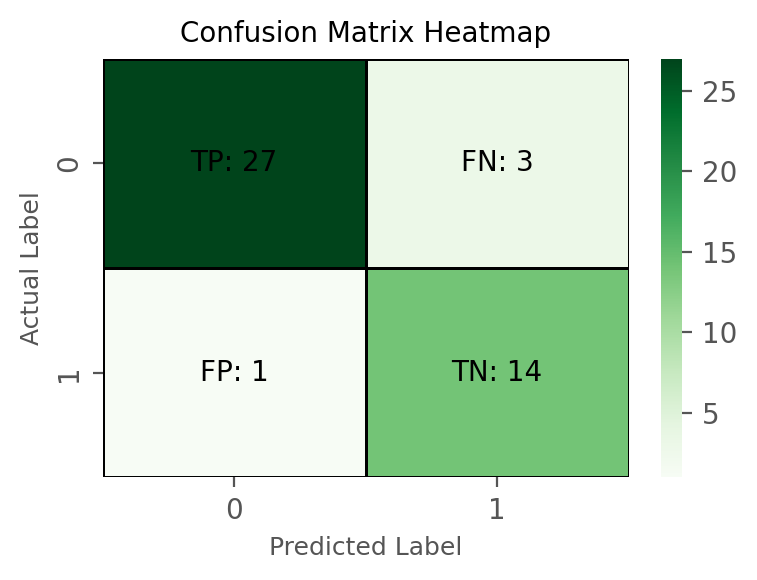

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, confusion_matrix
import seaborn as sns

# Get predicted probabilities from the neural network model
y_scores = model.predict(X_test_scaled).ravel()  # Probability of the positive class
y_true = y_test  # Your true labels for the test set

# Plot AUC-ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Create a subplot for ROC
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)
f1 = f1_score(y_true, (y_scores > 0.5).astype(int))  # Convert probabilities to binary predictions

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)  # Create a subplot for Precision-Recall
plt.plot(recall, precision, color='green', label='F1 Score: {:.2f}'.format(f1))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

# Show the plots
plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred = (y_scores > 0.5).astype(int)  # Convert probabilities to binary predictions
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap with higher DPI for better resolution
plt.figure(figsize=(4, 3), dpi=200)  # Increase DPI for sharper image
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Greens', cbar=True, 
            linewidths=0.5, linecolor='black')  # Add lines between cells for clarity

# Set the labels and title with larger font sizes
plt.ylabel('Actual Label', fontsize=9)
plt.xlabel('Predicted Label', fontsize=9)
plt.title('Confusion Matrix Heatmap', fontsize=10)

# Get the values for each cell in the confusion matrix
TP, FN, FP, TN = conf_matrix.ravel()

# Adding labels manually to the quadrants with larger font sizes
plt.text(0.5, 0.5, f'TP: {TP}', ha='center', va='center', color='black', fontsize=10)
plt.text(0.5, 1.5, f'FP: {FP}', ha='center', va='center', color='black', fontsize=10)
plt.text(1.5, 0.5, f'FN: {FN}', ha='center', va='center', color='black', fontsize=10)
plt.text(1.5, 1.5, f'TN: {TN}', ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [5]:
with open("Breast_cancer_detection_ameerah.py", "w") as file:
    file.write('''
import streamlit as st
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

# Load the dataset
df = pd.read_csv("Breast cancer dataset refined 2.0.csv")

# Assuming 'Diagnosis' column contains the labels for whether a person has breast cancer or not
X = df.drop("Diagnosis", axis=1) # Features
y = df["Diagnosis"] # Target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the deep learning model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())  # Optional: add batch normalization for stable learning
model.add(Dropout(0.2))  # Lower dropout rate
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0015), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor
                               patience=5,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)

# Train the model
model.fit(X_train_scaled, y_train, 
          epochs=50, 
          batch_size=32, 
          validation_split=0.15, 
          verbose=1, 
          callbacks=[early_stopping])

# Evaluate the model on the test set and calculate F1 score manually
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")

# Streamlit App
logo_path = r"C:\\Users\\Ameerah\\Downloads\\Think Pink! We've Gathered All The Breast Cancer Awareness Month Fashion Buys Right Here - Daily Front Row.jpeg" 
st.image(logo_path, use_column_width='auto')

# Streamlit app title
st.title("Ameerah's SmartPredict: A Machine Learning-Based Breast Cancer Prediction System")

# App description
st.write("""
Please Input Corresponding Patient Data
""")

# Sidebar for user inputs
st.header('Patient Input Parameters')

def user_input_features():
    Age = st.number_input('Enter Patient Age', min_value=1, max_value=120, step=1)  # Integer input for age
    gender_options = {
        "Male": 0,
        "Female": 1
    }
    Gender = st.selectbox('Gender', list(gender_options.keys()))  # Display gender options

    # Get the selected gender value
    Gender = gender_options[Gender]  # Map to numeric value

    # Create a dictionary to map labels to values for laterality
    laterality_options = {
        "Left": 1,
        "Right": 0
    }
    laterality = st.selectbox('Laterality', list(laterality_options.keys()))  # Display laterality options

    # Get the selected laterality value
    laterality = laterality_options[laterality]  # Map to numeric value

    # Create a dictionary to map labels to values for lymph node
    lymph_node_options = {
        "No": 0,
        "Yes": 1
    }
    Lymph_Node = st.selectbox('Lymph Node', list(lymph_node_options.keys()))  # Display lymph node options

    # Get the selected lymph node value
    Lymph_Node = lymph_node_options[Lymph_Node]

    
    
    Nature_of_Aspirate = st.selectbox('Nature of Aspirate', 
                                       ["colloid_Aspirate", "creamy_Aspirate", "hemorrhagic_Aspirate", 
                                        "milky_Aspirate", "mucoid_Aspirate", "oily_Aspirate", 
                                        "proteinaceous_Aspirate", "sanguineous_Aspirate", 
                                        "serous_Aspirate", "turbid_Aspirate"])

    Tumor_shape = st.selectbox('Tumor shape', 
                                       ['lobulated_shape', 'nodular_shape', 'oval_shape', 'round_shape', 'stellate_shape'])

                                        
     # Create a dictionary to map labels to values for familial cancer
    familial_cancer_options = {
        "No": 0,
        "Yes": 1
    }
    familial_cancer = st.selectbox('familial_cancer', list(familial_cancer_options.keys()))  # Display familial cancer options

    # Get the selected familial cancer value
    familial_cancer = familial_cancer_options[familial_cancer]
    
    data = {
        'Age': Age,
        'Gender': Gender,
        'laterality': laterality,
        'Lymph_Node': Lymph_Node,
        'Nature_of_Aspirate': Nature_of_Aspirate,
        'familial_cancer' : familial_cancer,
        'Tumor_shape' : Tumor_shape
    }

    # Convert the input data into a DataFrame
    features = pd.DataFrame(data, index=[0])
    
    # Align the features with the training data (adding missing columns if necessary)
    features = features.reindex(columns=X_train.columns, fill_value=0)
    
    return features

input_df = user_input_features()

if st.button('Submit'):
    # Scale the user input
    input_scaled = scaler.transform(input_df)

    # Make predictions based on user input
    prediction = model.predict(input_scaled)
    prob_malignant = prediction[0][0]  # Probability of malignant (1)
    prob_benign = 1 - prob_malignant   # Probability of benign (0)

    # Display the prediction results
    st.subheader('Prediction')
    
    if prob_malignant < 0.70 and prob_malignant > 0.5:
        st.write("Most likely malignant, further testing advised.")
    elif prob_malignant > 0.70:
        st.write(f"Predicted Diagnosis: {'Malignant' if prob_malignant >= 0.5 else 'Benign'}")

    if prob_benign < 0.70 and prob_benign > 0.5:
        st.write("Most likely benign, further testing advised.")
    elif prob_benign > 0.70:
        st.write(f"Predicted Diagnosis: {'Benign' if prob_malignant < 0.5 else 'Malignant'}")

    st.subheader('Prediction Probability')
    st.write(f"Probability of Malignant: {prob_malignant:.2f}")
    st.write(f"Probability of Benign: {prob_benign:.2f}")
    ''')

In [26]:
with open(r"C:\Users\Ameerah\OneDrive\Desktop\BREAST CANCER DEPLOYMENT\Breast_cancer_detection_ameerah.py", "w") as file:
    file.write('''
import streamlit as st
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

# Load the dataset
df = pd.read_csv("Breast_cancer_dataset_refined_2_0.csv")

# Assuming 'Diagnosis' column contains the labels for whether a person has breast cancer or not
X = df.drop("Diagnosis", axis=1) # Features
y = df["Diagnosis"] # Target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the deep learning model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())  # Optional: add batch normalization for stable learning
model.add(Dropout(0.2))  # Lower dropout rate
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0015), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor
                               patience=5,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)

# Train the model
model.fit(X_train_scaled, y_train, 
          epochs=50, 
          batch_size=32, 
          validation_split=0.15, 
          verbose=1, 
          callbacks=[early_stopping])

# Evaluate the model on the test set and calculate F1 score manually
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")

# Streamlit App
import streamlit as st

# Direct path to the image
st.image("images/image.jpeg", use_container_width=True)

# Streamlit app title
st.title("Ameerah's SmartPredict: A Machine Learning-Based Breast Cancer Prediction System")

# App description
st.write("""
Please Input Corresponding Patient Data
""")

# Sidebar for user inputs
st.header('Patient Input Parameters')

def user_input_features():
    Age = st.number_input('Enter Patient Age', min_value=1, max_value=120, step=1)  # Integer input for age
    gender_options = {
        "Male": 0,
        "Female": 1
    }
    Gender = st.selectbox('Gender', list(gender_options.keys()))  # Display gender options

    # Get the selected gender value
    Gender = gender_options[Gender]  # Map to numeric value

    # Create a dictionary to map labels to values for laterality
    laterality_options = {
        "Left": 1,
        "Right": 0
    }
    laterality = st.selectbox('Laterality', list(laterality_options.keys()))  # Display laterality options

    # Get the selected laterality value
    laterality = laterality_options[laterality]  # Map to numeric value

    # Create a dictionary to map labels to values for lymph node
    lymph_node_options = {
        "No": 0,
        "Yes": 1
    }
    Lymph_Node = st.selectbox('Lymph Node', list(lymph_node_options.keys()))  # Display lymph node options

    # Get the selected lymph node value
    Lymph_Node = lymph_node_options[Lymph_Node]

    
    
    Nature_of_Aspirate = st.selectbox('Nature of Aspirate', 
                                       ["colloid_Aspirate", "creamy_Aspirate", "hemorrhagic_Aspirate", 
                                        "milky_Aspirate", "mucoid_Aspirate", "oily_Aspirate", 
                                        "proteinaceous_Aspirate", "sanguineous_Aspirate", 
                                        "serous_Aspirate", "turbid_Aspirate"])

    Tumor_shape = st.selectbox('Tumor shape', 
                                       ['lobulated_shape', 'nodular_shape', 'oval_shape', 'round_shape', 'stellate_shape'])

                                        
     # Create a dictionary to map labels to values for familial cancer
    familial_cancer_options = {
        "No": 0,
        "Yes": 1
    }
    familial_cancer = st.selectbox('familial_cancer', list(familial_cancer_options.keys()))  # Display familial cancer options

    # Get the selected familial cancer value
    familial_cancer = familial_cancer_options[familial_cancer]
    
    data = {
        'Age': Age,
        'Gender': Gender,
        'laterality': laterality,
        'Lymph_Node': Lymph_Node,
        'Nature_of_Aspirate': Nature_of_Aspirate,
        'familial_cancer' : familial_cancer,
        'Tumor_shape' : Tumor_shape
    }

    # Convert the input data into a DataFrame
    features = pd.DataFrame(data, index=[0])
    
    # Align the features with the training data (adding missing columns if necessary)
    features = features.reindex(columns=X_train.columns, fill_value=0)
    
    return features

input_df = user_input_features()

if st.button('Submit'):
    # Scale the user input
    input_scaled = scaler.transform(input_df)

    # Make predictions based on user input
    prediction = model.predict(input_scaled)
    prob_malignant = prediction[0][0]  # Probability of malignant (1)
    prob_benign = 1 - prob_malignant   # Probability of benign (0)

    # Display the prediction results
    st.subheader('Prediction')
    
    if prob_malignant < 0.70 and prob_malignant > 0.5:
        st.write("Most likely malignant, further testing advised.")
    elif prob_malignant > 0.70:
        st.write(f"Predicted Diagnosis: {'Malignant' if prob_malignant >= 0.5 else 'Benign'}")

    if prob_benign < 0.70 and prob_benign > 0.5:
        st.write("Most likely benign, further testing advised.")
    elif prob_benign > 0.70:
        st.write(f"Predicted Diagnosis: {'Benign' if prob_malignant < 0.5 else 'Malignant'}")

    st.subheader('Prediction Probability')
    st.write(f"Probability of Malignant: {prob_malignant:.2f}")
    st.write(f"Probability of Benign: {prob_benign:.2f}")
    ''')
    


### CODE FOR DEPLOYMENT

In [46]:
with open("Breast_cancer_detection_AK.py", "w", encoding="utf-8") as file:
    file.write('''
import streamlit as st
from streamlit_option_menu import option_menu
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

# Load dataset
df = pd.read_csv("Breast_cancer_dataset_refined_2_0.csv")

# Prepare features and target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.0015), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.15, verbose=0, callbacks=[early_stopping])

# Evaluate on test
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# UI
logo_path = "images/image.jpeg"
st.image(logo_path, use_container_width=True)

# Navigation menu
selected = option_menu(
    menu_title=None,
    options=["Home", "Dataset", "About"],
    icons=["house", "table", "info-circle"],
    menu_icon="cast",
    default_index=0,
    orientation="horizontal"
)

# ---------------- Home / Prediction Page ----------------
if selected == "Home":
    st.title("Ameerah's SmartPredict: A Machine Learning-Based Breast Cancer Prediction System")
    st.markdown("Please input patient information to predict the likelihood of breast cancer.")

    st.markdown("### 👩‍⚕️ Patient Input Parameters")

    col1, col2 = st.columns(2)

    with col1:
        Age = st.number_input('Patient Age', min_value=1, max_value=120)
        Gender = st.selectbox('Gender', ['Male', 'Female'])
        familial_cancer = st.selectbox('Family History of Cancer', ['No', 'Yes'])

    with col2:
        Laterality = st.selectbox('Laterality', ['Left', 'Right'])
        Lymph_Node = st.selectbox('Lymph Node', ['No', 'Yes'])
        Tumor_shape = st.selectbox('Tumor Shape', 
            ['lobulated_shape', 'nodular_shape', 'oval_shape', 'round_shape', 'stellate_shape'])

    Nature_of_Aspirate = st.selectbox(
        'Nature of Aspirate',
        ["colloid_Aspirate", "creamy_Aspirate", "hemorrhagic_Aspirate",
        "milky_Aspirate", "mucoid_Aspirate", "oily_Aspirate",
        "proteinaceous_Aspirate", "sanguineous_Aspirate",
        "serous_Aspirate", "turbid_Aspirate"]
    )

    gender_map = {"Male": 0, "Female": 1}
    laterality_map = {"Left": 1, "Right": 0}
    lymph_node_map = {"No": 0, "Yes": 1}
    fam_cancer_map = {"No": 0, "Yes": 1}
        
    data = {
        'Age': Age,
        'Gender': gender_map[Gender],
        'laterality': laterality_map[Laterality],
        'Lymph_Node': lymph_node_map[Lymph_Node],
        'Nature_of_Aspirate': Nature_of_Aspirate,
        'familial_cancer': fam_cancer_map[familial_cancer],
        'Tumor_shape': Tumor_shape
    }

    input_df = pd.DataFrame(data, index=[0])
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)

    if st.button('Submit'):
        input_scaled = scaler.transform(input_df)
        prediction = model.predict(input_scaled)
        prob_malignant = prediction[0][0]
        prob_benign = 1 - prob_malignant

        st.subheader("🧬 Prediction Result")

        if prob_malignant > 0.7:
            st.error("🔴 High Risk of Malignancy — Please seek further testing.")
        elif prob_malignant > 0.5:
            st.warning("🟠 Moderate Risk — Clinical follow-up advised.")
        elif prob_benign > 0.7:
            st.success("🟢 Low Risk — Likely Benign.")
        else:
            st.info("🧭 Uncertain — Retesting may be necessary.")

        st.markdown("### 📊 Prediction Probability")
        st.metric("Malignant Probability", f"{prob_malignant:.2%}")
        st.metric("Benign Probability", f"{prob_benign:.2%}")


# ---------------- Dataset Page ----------------
elif selected == "Dataset":
    st.title("📊 Dataset Preview")
    st.write("Below is the dataset used to train the prediction model.")
    st.dataframe(df)

    st.markdown("### 🧮 Class Distribution")
    fig, ax = plt.subplots()
    sns.set_style("whitegrid")
    sns.countplot(x='Diagnosis', data=df, palette='pastel', ax=ax)
    st.pyplot(fig)

# ---------------- About Page ----------------
elif selected == "About":
    st.title("ℹ️ About Ameerah's SmartPredict")
    st.markdown("""
    **Ameerah's SmartPredict** is an intelligent diagnostic support tool built to enhance the early detection of breast cancer using advanced machine learning techniques.

This application is specifically designed to support laboratory technicians in Nigeria, where there remains a significant gap in the integration of modern technology within diagnostic workflows.
By leveraging patient data and aspirate characteristics, SmartPredict offers quick, reliable predictions to aid clinical decision-making — even in resource-limited settings.
    
     
    - Developed by Ameerah Kareem  
  Bridging the gap between traditional lab practices and smart diagnostic tools

    """)

# ---------------- Footer ----------------
st.markdown("---")
st.markdown("<center style='color: gray;'>Made with 💙 by Ameerah | Powered by Streamlit + TensorFlow</center>", unsafe_allow_html=True)
''')


In [4]:
!pip install fpdf
